In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("predict_students_dropout_and_academic_success.csv", sep = ";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### *Preprocessing* ###

In [2]:
df.isna().sum(axis = 0)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [3]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [4]:
def encode_target(value: str) -> int:
    if value == "Dropout" or value == "Enrolled":
        return 0
    return 1

In [5]:
df["Target"] = df["Target"].apply(encode_target)

In [6]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


### *Normalization* ###

In [7]:
unique_courses = sorted(df["Course"].unique())  
course_mapping = {course: i for i, course in enumerate(unique_courses)}

df["Course"] = df["Course"].map(course_mapping)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,1,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,10,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,4,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,14,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,2,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [8]:
continuous_columns = ["Previous qualification (grade)",
                      "Admission grade",
                      "Curricular units 1st sem (grade)",
                      "Curricular units 2nd sem (grade)",
                      "Unemployment rate",
                      "Inflation rate",
                      "GDP"]
for column in continuous_columns:
    df[column] = (df[column] - df[column].mean())/(df[column].std())

In [9]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,1,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,10,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,4,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,14,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,2,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1


### *Feature Engineering* ###

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
discrete_columns = [column for column in df.columns if column not in continuous_columns]

C:\Users\hhtnh\.conda\envs\my_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\hhtnh\.conda\envs\my_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


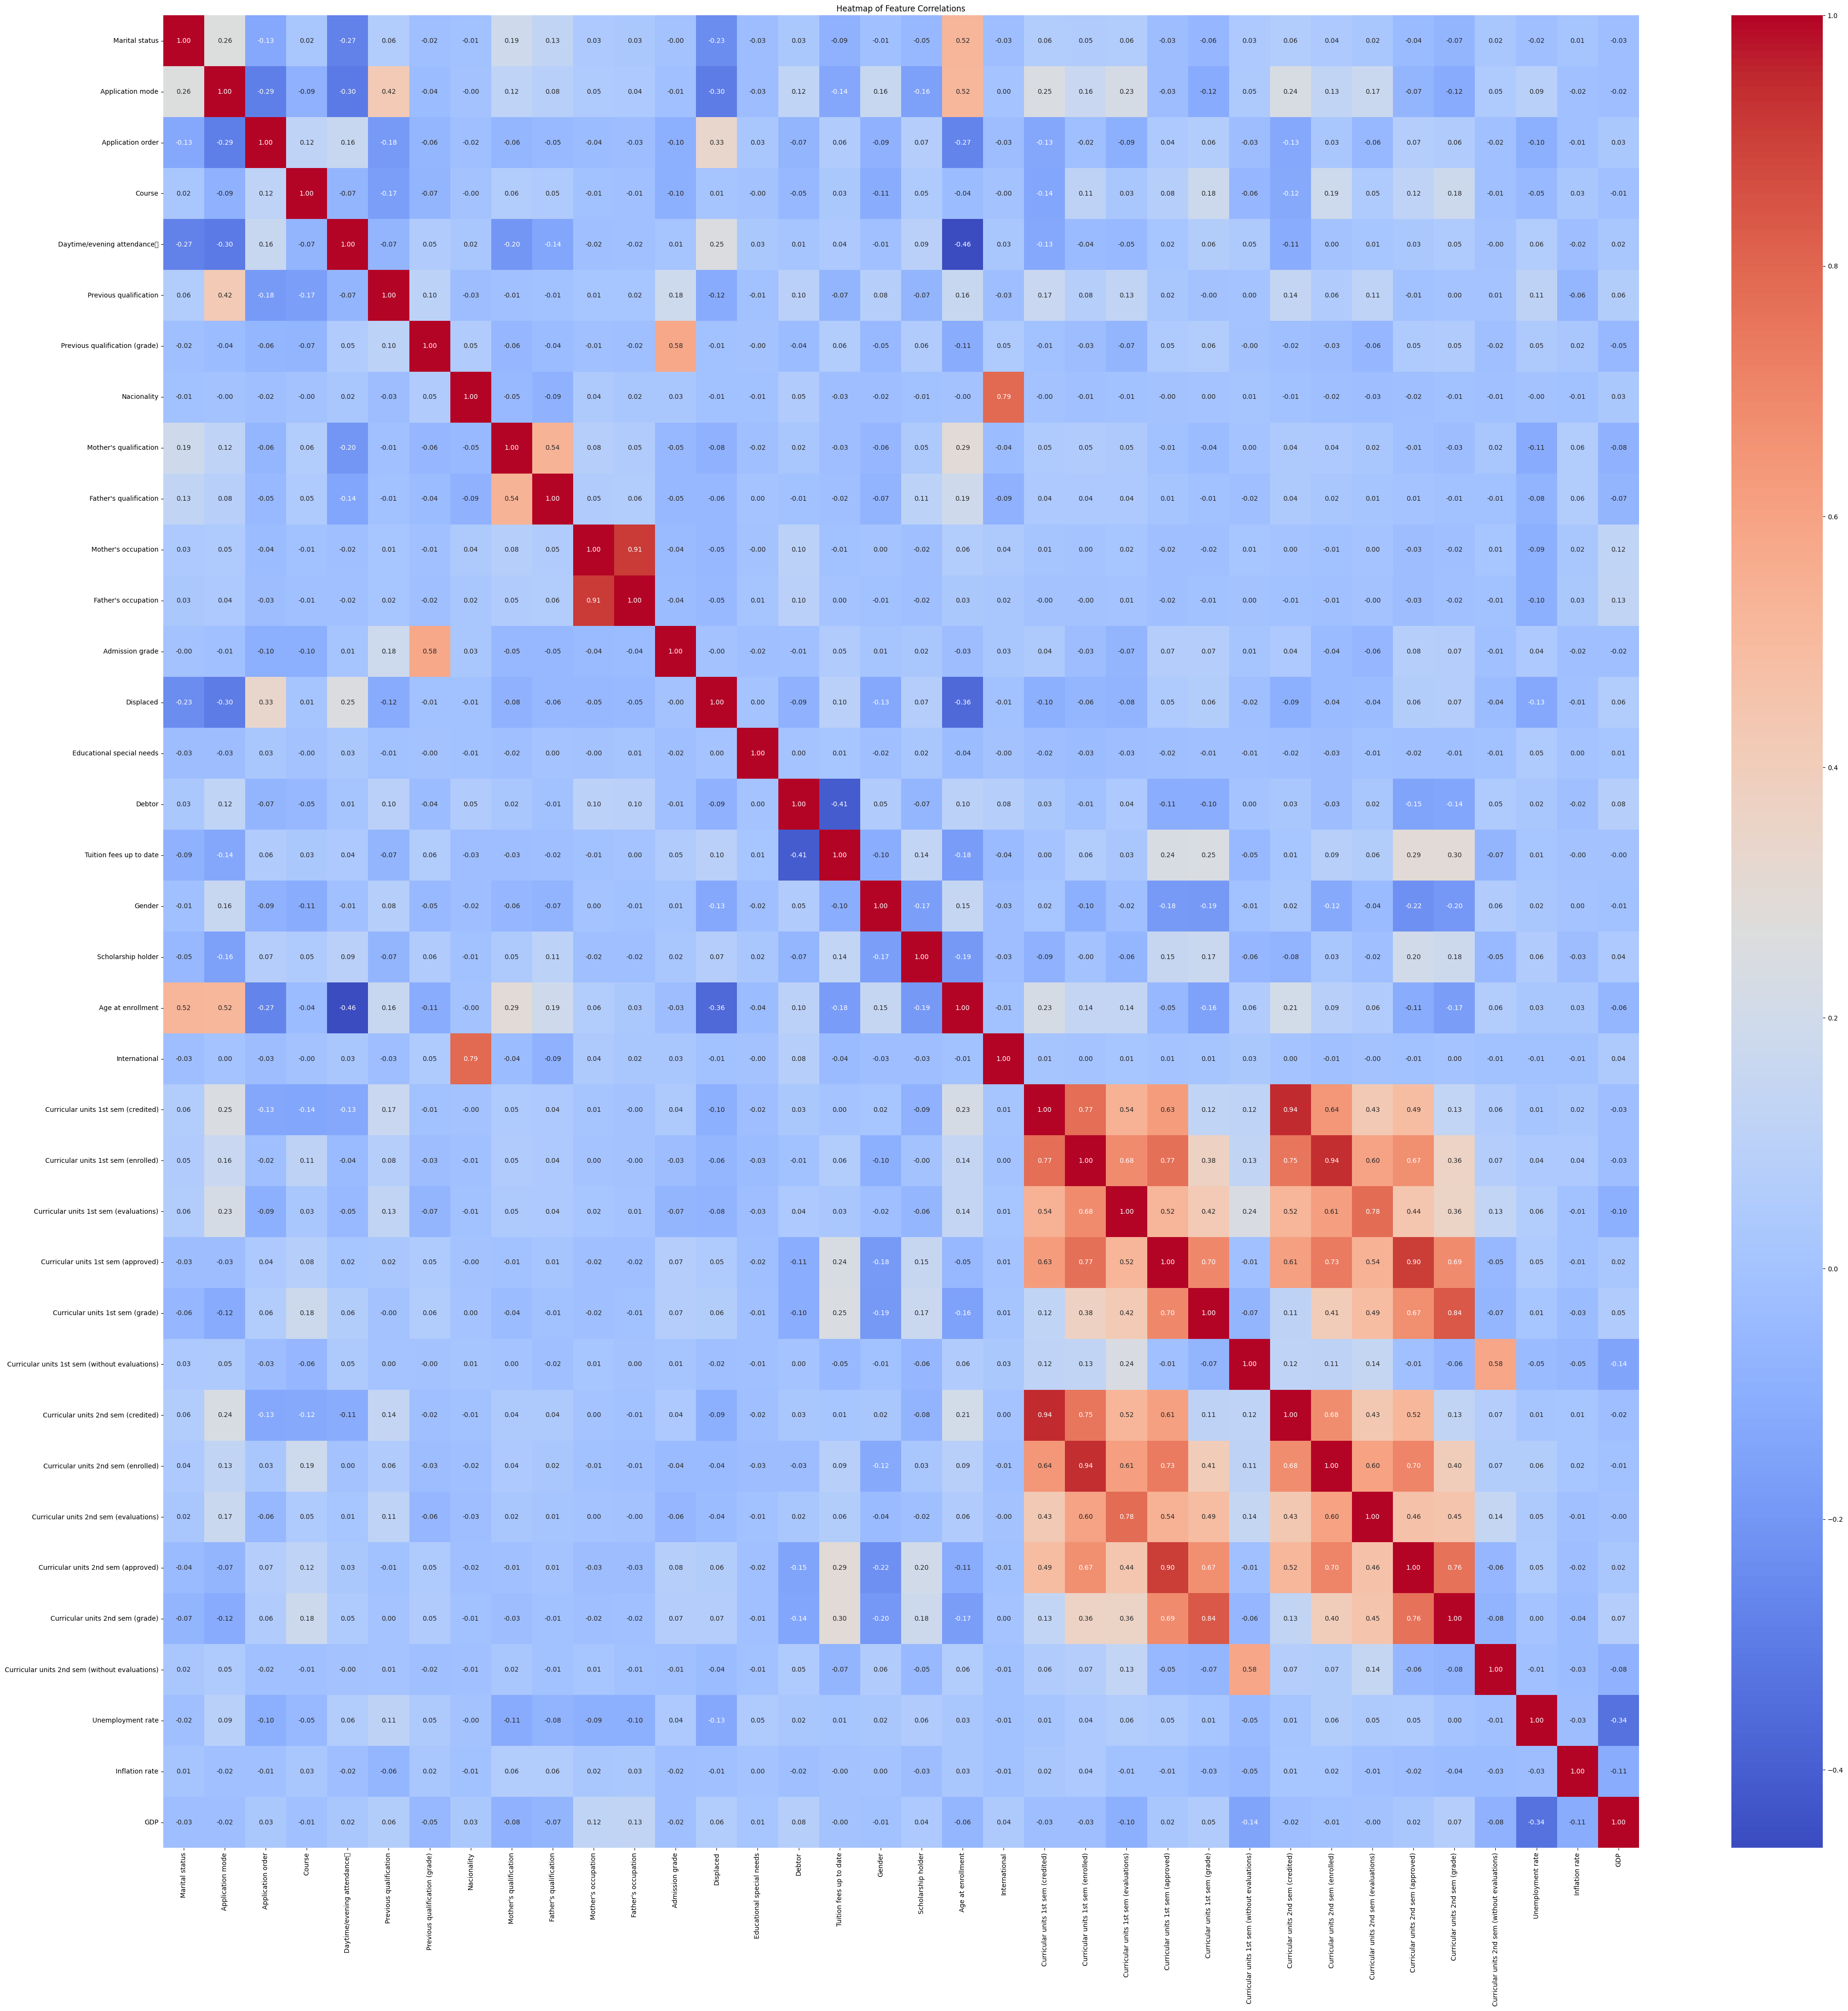

In [12]:
#Cach 1:
num_features = len(df.columns) - 1  
cov = np.zeros((num_features, num_features))  

for i, col_name_i in enumerate(df.columns[:-1]):
    for j, col_name_j in enumerate(df.columns[:-1]):
        cov[i, j] = np.corrcoef(df[col_name_i].to_numpy(), df[col_name_j].to_numpy())[0, 1]

# Vẽ Heatmap cho ma trận tương quan
plt.figure(figsize=(50, 50)) 
sns.heatmap(cov, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

C:\Users\hhtnh\.conda\envs\my_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\hhtnh\.conda\envs\my_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


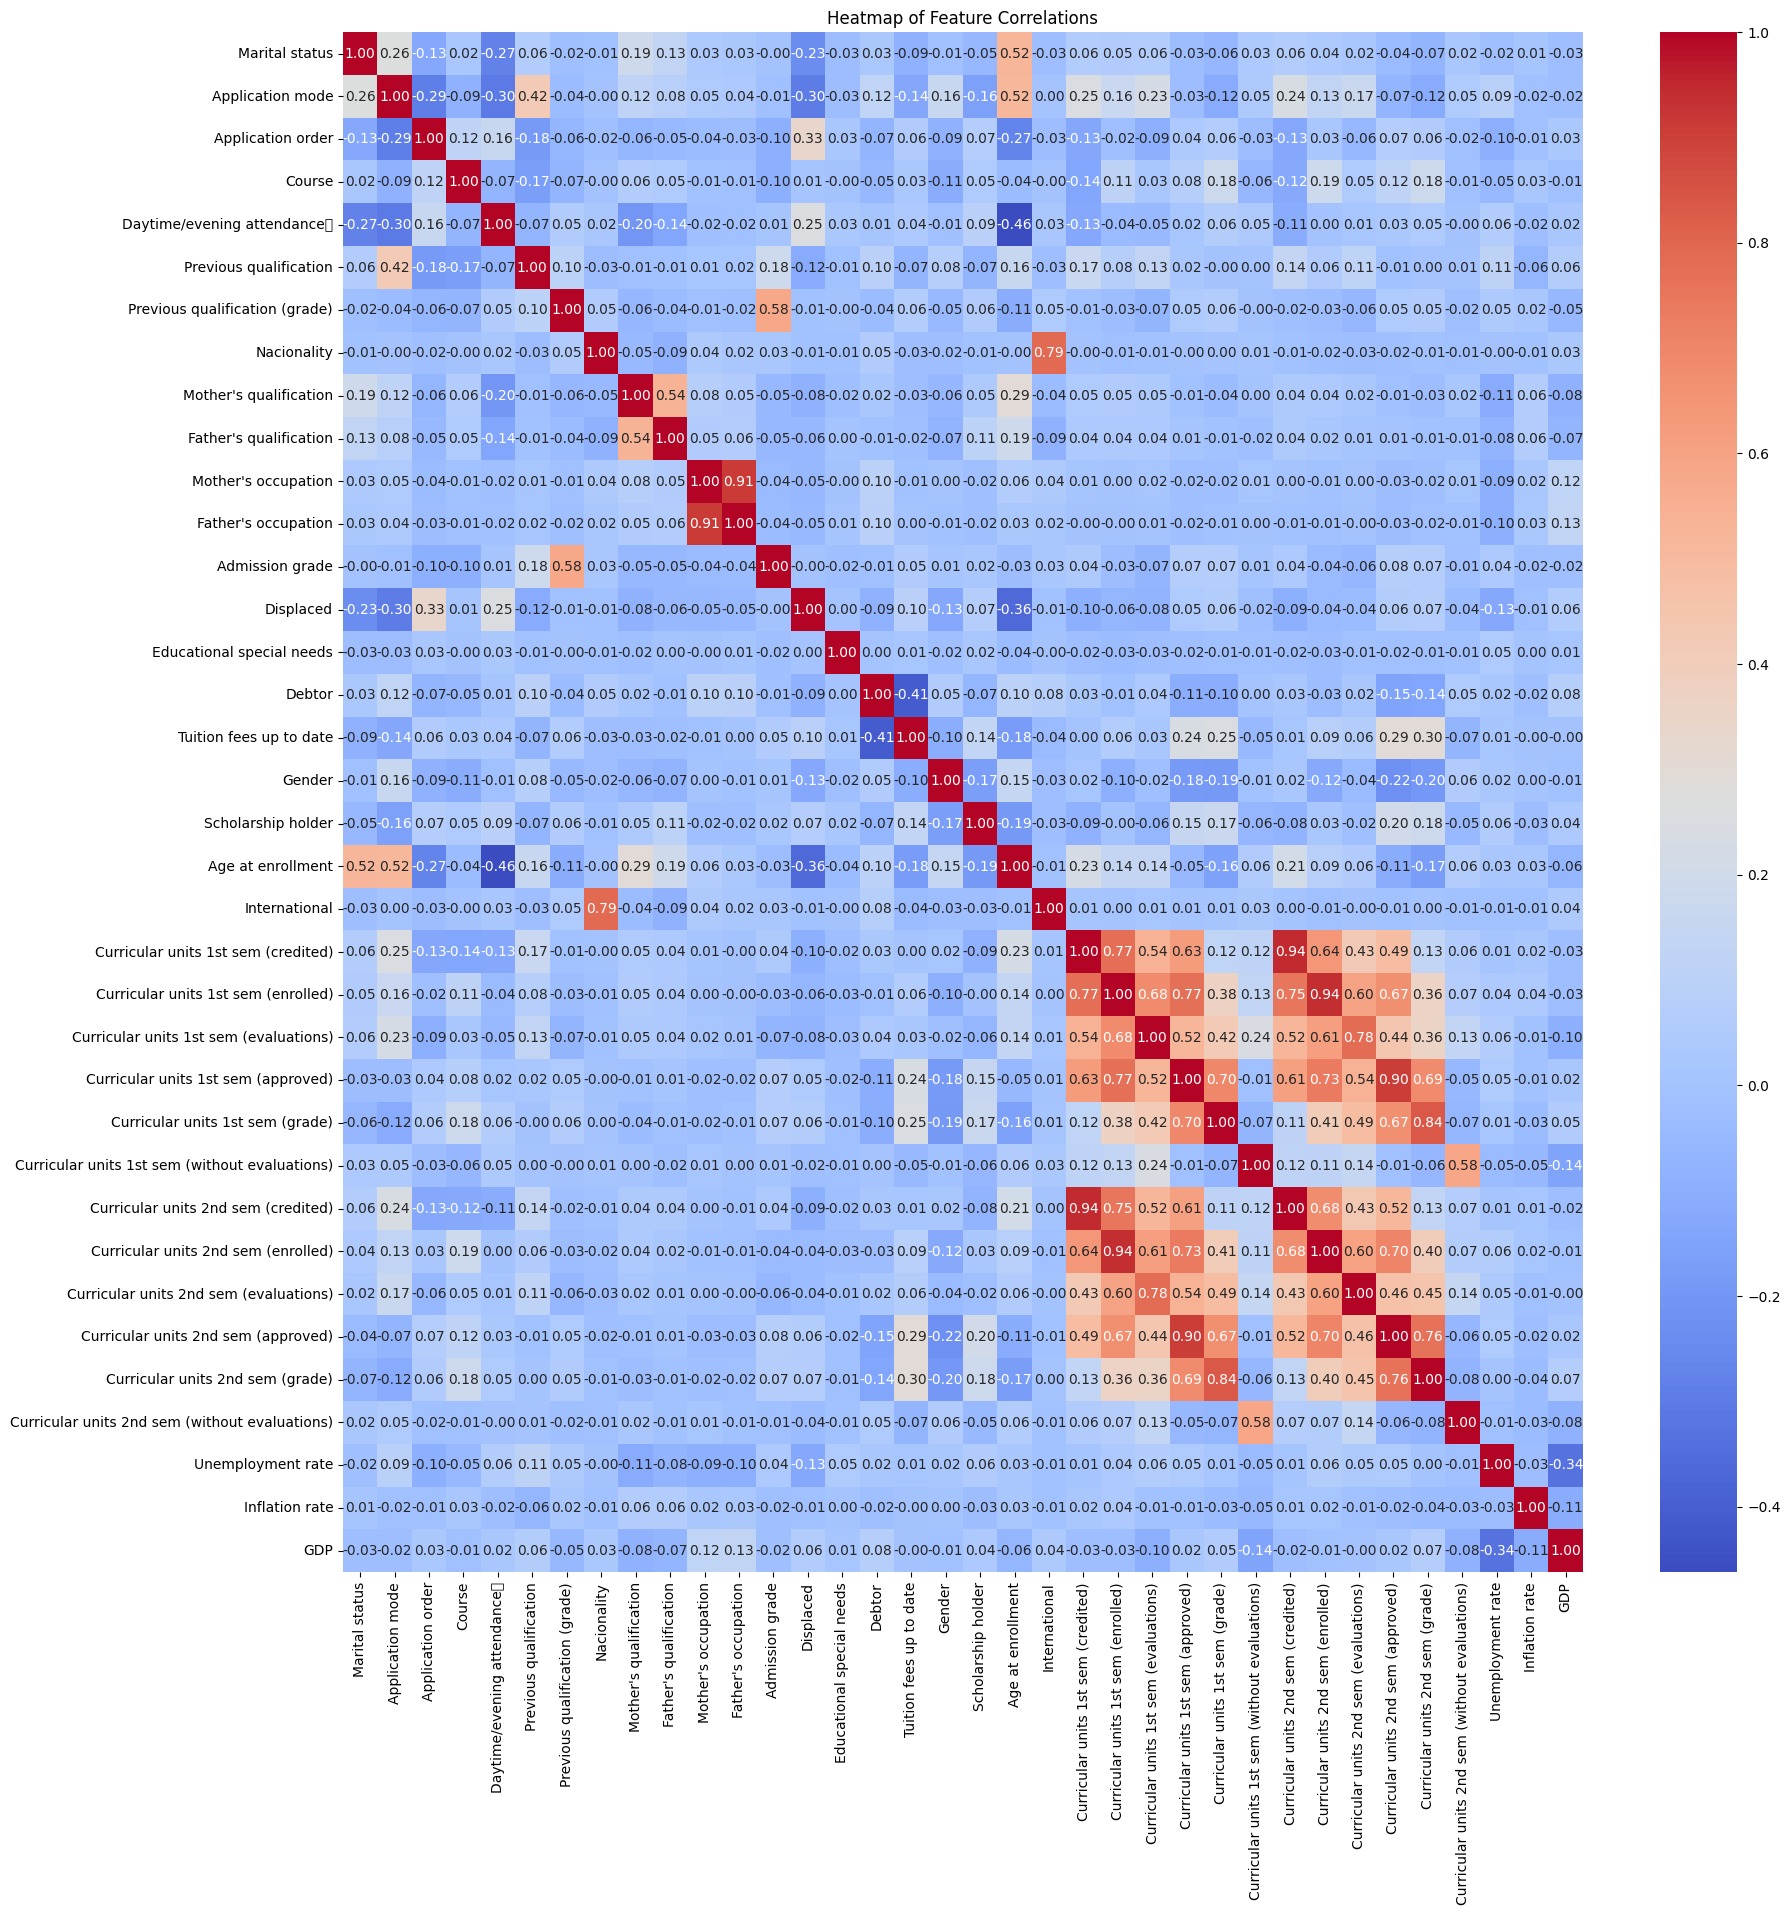

In [14]:
#Cach 2:
num_features = len(df.columns) - 1  
cov = np.zeros((num_features, num_features))  

cov = df.iloc[:, :-1].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(cov, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=cov.columns, yticklabels=cov.columns)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [15]:
correlation_pairs = cov.unstack()

# Lọc ra những cặp có tương quan > 0.8 và không phải là chính nó (loại bỏ đường chéo 1.0)
strong_correlations = correlation_pairs[(correlation_pairs >= 0.8) & (correlation_pairs < 1)]

# Loại bỏ các cặp trùng lặp (vì ma trận tương quan đối xứng)
strong_correlations = strong_correlations.reset_index()
strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
strong_correlations = strong_correlations[strong_correlations['Feature 1'] < strong_correlations['Feature 2']]

# Hiển thị kết quả
print(strong_correlations)

                             Feature 1                            Feature 2  \
1                  Father's occupation                  Mother's occupation   
2  Curricular units 1st sem (credited)  Curricular units 2nd sem (credited)   
3  Curricular units 1st sem (enrolled)  Curricular units 2nd sem (enrolled)   
4  Curricular units 1st sem (approved)  Curricular units 2nd sem (approved)   
5     Curricular units 1st sem (grade)     Curricular units 2nd sem (grade)   

   Correlation  
1     0.910472  
2     0.944811  
3     0.942627  
4     0.904002  
5     0.837170  


In [16]:
columns_to_drop = ["Father's occupation", "Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)",  
"Curricular units 1st sem (approved)",   "Curricular units 1st sem (grade)"]

df_reduced = df.drop(columns=columns_to_drop)
df_reduced.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,1,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,10,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,4,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,14,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,2,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1


In [17]:
X = df_reduced.iloc[:, :-1].to_numpy()
y = df_reduced.iloc[:, -1].to_numpy()

In [18]:
y = y[:, np.newaxis] 

In [19]:
print(y.shape)

(4424, 1)


In [20]:
def split(X,y,train_size = 0.8):
    X = np.array(X)
    y = np.array(y)

    num_samples = X.shape[0]
    train_size = int(train_size * num_samples)

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    return X_train, X_test, y_train, y_test

In [21]:
X_train,X_test,y_train,y_test = split(X,y,train_size=0.8)

### *Logistic Regression* ###

In [40]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, epoch: int, lr: float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
    
    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))
    
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        eps = 1e-9  # Tránh log(0)
        return -(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps)).mean()
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return (1-np.abs(y-y_hat)).mean()
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        m, d = X.shape
        X = np.hstack([np.ones((m, 1)), X])  
        self.theta = np.zeros((d + 1, 1))
        
        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                pb.set_description(f"Epoch {e+1}")
                
                y_hat = self.predict(X)
                diff = y_hat - y
                gradient = (1/m) * np.matmul(X.T, diff)
                self.theta -= self.lr * gradient
                
                y_hat = self.predict(X)
                loss = self.loss_fn(y, y_hat)
                acc = self.accuracy(y, y_hat)

                self.losses.append(loss)
                self.metrics.append(acc)
                pb.set_description(f"Epoch {e+1} - Loss: {loss:.4f}, Acc: {acc:.4f}")
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        if X.shape[1] == self.theta.shape[0] - 1:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
        z = np.matmul(X, self.theta)
        return self.sigmoid(z)


In [41]:
logistic_reg = LogisticRegression(1000,0.2)

In [42]:
logistic_reg.fit(X_train,y_train)

Epoch 1000 - Loss: 4.0364, Acc: 0.7703: 100%|██████████| 1000/1000 [00:04<00:00, 241.63it/s]


In [53]:
y_train_hat = logistic_reg.predict(X_train)
acc_train = logistic_reg.accuracy(y_train, y_train_hat)
print(f'Training Accuracy: {acc_train:.4f}')

Training Accuracy: 0.7703


In [54]:
y_test_hat = logistic_reg.predict(X_test)
acc_test = logistic_reg.accuracy(y_test, y_hat_test)
print(f'Test Accuracy: {acc_test:.4f}')

Test Accuracy: 0.7492


### *Sử dụng thư viện Sklearn* ###

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state = 42)

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\hhtnh\.conda\envs\my_env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hhtnh\.conda\envs\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_train_hat = model.predict(X_train)
print(f'Accuracy: {accuracy_score(y_train, y_train_hat): .4f}')

Accuracy:  0.8665


In [52]:
y_test_hat = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_test_hat): .4f}')

Accuracy:  0.8345
